In [13]:
%load_ext autoreload
%autoreload 2

import gymnasium as gym
from gymnasium.envs.registration import register
import toy_env as te
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

# register(
#      id="ToyEnv-v0",
#      entry_point="gym_examples.envs:GridWorldEnv",
#      max_episode_steps=300,
# )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Notes

The policy can be regard not as the policy chosen when we have i links in the memory but when we want to generate s-i links ahead

the interpolation generates several actions that give a 'sweep' over all bins

is the general distribution approximately exponential

need rigor content in the paper

impossible to interpolate without knowledge between sending 1/2 link actions

In [51]:
p1, p2 = 0.2, 0.4
lam = 1
protocols = [[0.2,0.4],[1-lam*p1,1-lam*p2]]
num_qubits = 4
threshold = 1/2
decay_rate = 0.17
env = te.ToyEnv(protocols, num_qubits ,threshold, decay_rate)

the total bin size is:
4
the bins are:
[4.0, 1.0]


### baseline

[[0.3987631023591016, 0.3336772012635284, 0.25653056694238807], [0.6012368976408984, 0.6663227987364716, 0.7434694330576119]]
3
the total bin size is:
4
the bins are:
[1.0, 3.0, 4.0]


100%|██████████| 2000/2000 [00:07<00:00, 283.63it/s]


122.028
158.86011524608685
[35, 29, 274, 2, 130, 2, 39, 3, 137, 59, 166, 13, 97, 2, 19, 2, 276, 122, 326, 2, 246, 691, 628, 51, 177, 85, 148, 234, 58, 44, 2, 63, 228, 78, 233, 126, 112, 285, 42, 2, 518, 97, 388, 533, 306, 172, 15, 62, 3, 305, 354, 554, 178, 27, 201, 271, 336, 2, 340, 102, 232, 160, 97, 25, 392, 30, 2, 6, 2, 2, 2, 25, 4, 2, 125, 19, 2, 38, 52, 2, 87, 2, 143, 7, 82, 241, 276, 287, 56, 3, 124, 162, 2, 61, 2, 45, 2, 2, 2, 3, 2, 29, 81, 156, 666, 3, 2, 21, 2, 2, 264, 8, 91, 12, 135, 564, 60, 2, 153, 596, 452, 2, 12, 2, 359, 34, 172, 2, 319, 84, 29, 3, 2, 124, 193, 360, 18, 14, 2, 130, 389, 2, 65, 2, 34, 226, 2, 139, 2, 201, 149, 281, 227, 284, 219, 2, 2, 67, 2, 6, 2, 157, 147, 2, 287, 264, 2, 49, 171, 366, 337, 520, 273, 81, 5, 19, 145, 2, 2, 414, 504, 477, 2, 2, 3, 230, 345, 58, 254, 80, 28, 52, 3, 130, 2, 147, 182, 2, 236, 2, 2, 52, 2, 2, 3, 62, 2, 143, 634, 3, 9, 2, 2, 83, 2, 161, 104, 382, 15, 2, 2, 83, 135, 311, 605, 289, 62, 155, 60, 2, 226, 501, 2, 131, 368, 2, 3, 24

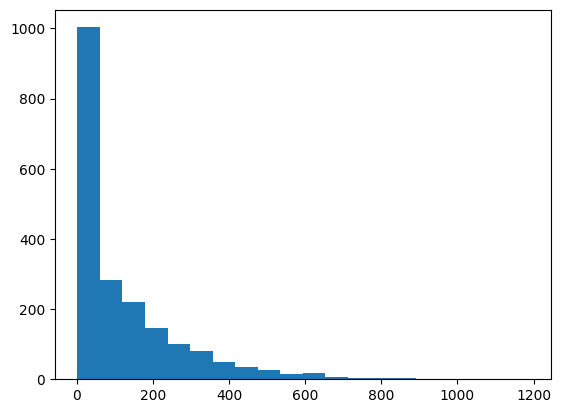

In [52]:
# random choice1
p = []
f = []
for i in range(env.bin_size_min+1,env.bin_size+1):
    temp = (threshold-1/4)*np.exp(i*decay_rate)+1/4
    f.append(temp)
    p.append((1-temp)/lam)
random_protocols = [p,f]
print(random_protocols)
print(len(p))
random_env = te.ToyEnv(random_protocols, num_qubits ,threshold, decay_rate)
depth_random = []
shots = 2000
for i in tqdm(range(shots)):
    obs = []
    observation, info = env.reset()
    obs.append(observation)
    while True:
        action = np.random.choice(list(range(len(p))))
        observation, reward, terminated, truncated, info = random_env.step(action)
        obs.append(observation)
        # print(observation)
        if terminated:
            break
    depth_random.append(len(obs))

m_depth_random = np.mean(depth_random)
std_depth_random = np.std(depth_random)
plt.hist(depth_random,bins=20)
print(m_depth_random)
print(std_depth_random)
print(depth_random)

In [ ]:
# random choice2
depth_random = []
shots = 2000
for i in tqdm(range(shots)):
    obs = []
    observation, info = env.reset()
    obs.append(observation)
    while True:
        action = np.random.choice([0,1])
        observation, reward, terminated, truncated, info = env.step(action)
        obs.append(observation)
        # print(observation)
        if terminated:
            break
    depth_random.append(len(obs))

m_depth_random = np.mean(depth_random)
std_depth_random = np.std(depth_random)
plt.hist(depth_random,bins=20)
print(m_depth_random)
print(std_depth_random)
print(depth_random)

In [47]:
2*176/np.sqrt(2000)

7.870959280799259

the total bin size is:
3.0
the bins are:
[3.0]


100%|██████████| 2000/2000 [00:01<00:00, 1982.11it/s]


177.326
176.11661683100775
[69, 24, 42, 46, 74, 93, 471, 31, 37, 142, 17, 97, 231, 90, 145, 93, 211, 77, 139, 177, 31, 302, 67, 328, 23, 98, 88, 140, 92, 81, 480, 60, 113, 219, 397, 328, 17, 421, 499, 101, 955, 149, 368, 16, 76, 122, 37, 112, 162, 7, 376, 51, 312, 80, 620, 51, 323, 8, 368, 53, 218, 173, 215, 396, 79, 143, 356, 39, 170, 203, 136, 256, 268, 256, 269, 14, 622, 175, 43, 290, 90, 21, 81, 72, 202, 35, 58, 68, 177, 528, 91, 61, 33, 200, 374, 116, 227, 190, 20, 76, 142, 328, 136, 173, 105, 491, 43, 300, 72, 253, 73, 148, 33, 792, 205, 10, 361, 148, 115, 68, 162, 597, 210, 151, 95, 280, 130, 568, 294, 342, 49, 339, 8, 12, 372, 179, 14, 22, 398, 94, 475, 146, 20, 581, 223, 97, 27, 188, 154, 195, 33, 65, 567, 5, 253, 375, 42, 22, 38, 86, 96, 96, 33, 112, 78, 108, 388, 155, 83, 62, 197, 153, 147, 182, 57, 89, 238, 130, 219, 154, 170, 35, 62, 169, 322, 220, 868, 96, 80, 22, 140, 58, 450, 75, 72, 472, 265, 10, 200, 162, 88, 34, 19, 556, 123, 149, 267, 419, 44, 208, 19, 138, 266, 184

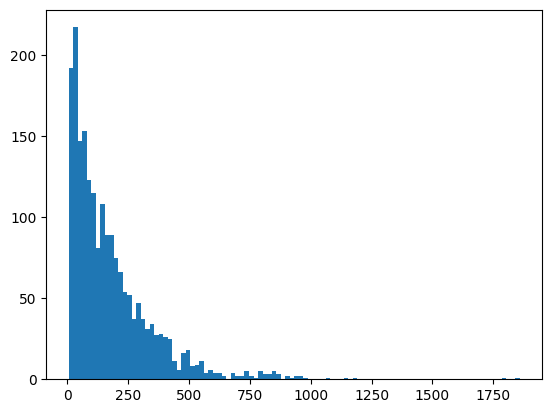

In [44]:
# fixed action
protocols_fixed = [[0.3],[0.7]]
env_fixed = te.ToyEnv(protocols_fixed, num_qubits ,threshold, decay_rate)

depth_fixed = []
shots = 2000
for i in tqdm(range(shots)):
    obs = []
    observation, info = env_fixed.reset()
    obs.append(observation)
    while True:
        observation, reward, terminated, truncated, info = env_fixed.step(0)
        obs.append(observation)
        # print(observation)
        if terminated:
            break
    depth_fixed.append(len(obs))

m_depth_fixed = np.mean(depth_fixed)
std_depth_fixed = np.std(depth_fixed)
plt.hist(depth_fixed,bins=100)
print(m_depth_fixed)
print(std_depth_fixed)
print(depth_fixed)

### Heuristics(discrete)

In [14]:
def policy_maker(protocols, threshold, decay_rate, alpha = 1):
    probs = protocols[0].copy()
    ahead = 0
    bins = []
    for f in protocols[1]:
        bin = np.floor(np.log((f-0.25)/(threshold-0.25))/decay_rate)
        bins.append(bin)
    policy = []
    count = 0
    for i in range(num_qubits):
        policy.append(np.argmax(probs))
        ahead = ahead + alpha/protocols[0][policy[i]]
        e_t = np.ceil(ahead)
        for j in range(len(probs)):
            temp = bins[j] - e_t
            if temp<0 and count<len(probs) :
                probs[j] = -1
                count = count + 1
    return policy[::-1]

print(policy_maker(protocols,threshold,decay_rate))


[1, 1, 1, 0]


In [17]:
def batch_heuristic(shots, env, policy):
    depth_heuristic = []
    for i in tqdm(range(shots)):
        obs = []
        observation, info = env.reset()
        obs.append(observation)
        while True:
            action = policy[len(obs[-1])]
            observation, reward, terminated, truncated, info = env.step(action)
            obs.append(observation)
            # print(observation)
            if terminated:
                break
        depth_heuristic.append(len(obs))
    return depth_heuristic

policy = policy_maker(protocols, threshold, decay_rate)
test = batch_heuristic(1,env,policy)
print('can run one batch')
depth_heuristic = batch_heuristic(100,env,policy)
print(np.mean(depth_heuristic))
print(np.std(depth_heuristic))


100%|██████████| 1/1 [00:00<00:00, 500.22it/s]


can run one batch


100%|██████████| 100/100 [00:00<00:00, 2564.49it/s]

121.9
109.96694958031708


[0, 0, 1, 1]
[0, 0, 1, 1]
[0, 0, 1, 1]
[0, 0, 1, 1]
[0, 0, 1, 1]
[0, 0, 1, 1]
[0, 0, 1, 1]
[0, 0, 1, 1]
[0, 0, 1, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]

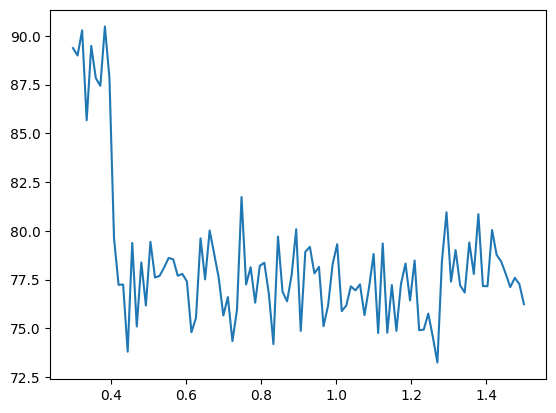

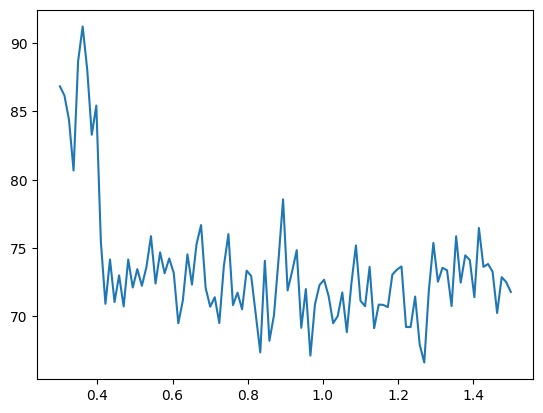

In [62]:

h_mean = []
h_std = []
space = np.linspace(0.3,1.5,100)
for alpha in space:
    policy = policy_maker(protocols, threshold, decay_rate, alpha)
    print(policy)
    depth_heuristic = batch_heuristic(2000,env,policy)
    h_mean.append(np.mean(depth_heuristic))
    h_std.append(np.std(depth_heuristic))

print(np.amin(h_mean))
plt.plot(space, h_mean)
plt.show()
plt.plot(space, h_std)
plt.show()

### Native continuous action

In [18]:
#case natively continuous
import acnt_env as cenv

protocols = [[0.1,0.4],[0.9,0.6]]
num_qubits = 15
threshold = 1/2
decay_rate = 0.02


cnt_env = cenv.AcntEnv(protocols, num_qubits ,threshold, decay_rate)


the upper bin size is:
47.0
the lower bin size
16.0


In [19]:
def policy_maker_ct(env, alpha = 1.15):
    ahead = 0
    policy = []
    policy_bin = []
    for i in range(env.num_qubits):
        n = alpha*ahead
        tp_n = np.floor(n)
        f_q = (env.threshold - 1/4)*np.exp(env.decay_rate*tp_n) + 1/4
        q = (env.F_max-f_q)/(env.F_max-env.F_min)
        if q<0:
            q = 0
            tp_n = env.bin_size
        elif q>1:
            q = 1
            tp_n = env.bin_size_min
        policy.append(q)
        policy_bin.append(tp_n)
        ahead = ahead + alpha/(env.p_max*policy[i]+env.p_min*(1-policy[i]))
    return policy[::-1], policy_bin[::-1]

print(policy_maker_ct(cnt_env))

([0, 0, 0, 0.27458346872299494, 0.4885394104412695, 0.6175599651280482, 0.7366609481792843, 0.8466050125045986, 0.9480961754714795, 1, 1, 1, 1, 1, 1], [47.0, 47.0, 47.0, 41.0, 35.0, 31.0, 27.0, 23.0, 19.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0])


100%|██████████| 1/1 [00:00<00:00, 501.77it/s]


can run one batch


100%|██████████| 200/200 [00:00<00:00, 600.57it/s]


160.78
164.2876489575525


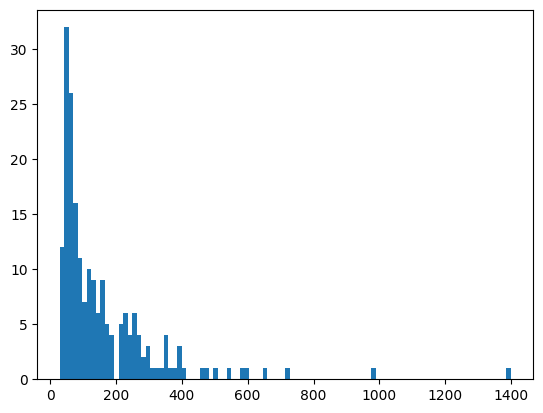

In [20]:
def batch_heuristic(shots, env, policy):
    depth_heuristic = []
    for i in tqdm(range(shots)):
        obs = []
        observation, info = env.reset()
        obs.append(observation)
        while True:
            action = policy[len(obs[-1])]
            observation, reward, terminated, truncated, info = env.step(action)
            obs.append(observation)
            # print(observation)
            if terminated:
                break
        depth_heuristic.append(len(obs))
    return depth_heuristic

policy = policy_maker_ct(cnt_env,1.2)[0]
test = batch_heuristic(1,cnt_env,policy)
print('can run one batch')
depth_heuristic = batch_heuristic(200,cnt_env,policy)
plt.hist(depth_heuristic,bins=100)
print(np.mean(depth_heuristic))
print(np.std(depth_heuristic))

the upper bin size is:
47.0
the lower bin size
16.0
[1] [16.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 88808.75it/s]


the upper bin size is:
47.0
the lower bin size
16.0
[1, 1] [16.0, 16.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 45453.41it/s]


the upper bin size is:
47.0
the lower bin size
16.0
[1, 1, 1] [16.0, 16.0, 16.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 33334.29it/s]


the upper bin size is:
47.0
the lower bin size
16.0
[1, 1, 1, 1] [16.0, 16.0, 16.0, 16.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 25975.18it/s]


the upper bin size is:
47.0
the lower bin size
16.0
[1, 1, 1, 1, 1] [16.0, 16.0, 16.0, 16.0, 16.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 18868.27it/s]


the upper bin size is:
47.0
the lower bin size
16.0
[1, 1, 1, 1, 1, 1] [16.0, 16.0, 16.0, 16.0, 16.0, 16.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 15149.11it/s]


the upper bin size is:
47.0
the lower bin size
16.0
[0.9480961754714795, 1, 1, 1, 1, 1, 1] [19.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 10810.86it/s]


the upper bin size is:
47.0
the lower bin size
16.0
[0.8466050125045986, 0.9480961754714795, 1, 1, 1, 1, 1, 1] [23.0, 19.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 9479.62it/s]


the upper bin size is:
47.0
the lower bin size
16.0
[0.7366609481792843, 0.8466050125045986, 0.9480961754714795, 1, 1, 1, 1, 1, 1] [27.0, 23.0, 19.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 7299.32it/s]


the upper bin size is:
47.0
the lower bin size
16.0
[0.6175599651280482, 0.7366609481792843, 0.8466050125045986, 0.9480961754714795, 1, 1, 1, 1, 1, 1] [31.0, 27.0, 23.0, 19.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 5555.31it/s]


the upper bin size is:
47.0
the lower bin size
16.0
[0.4885394104412695, 0.6175599651280482, 0.7366609481792843, 0.8466050125045986, 0.9480961754714795, 1, 1, 1, 1, 1, 1] [35.0, 31.0, 27.0, 23.0, 19.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 3952.48it/s]


the upper bin size is:
47.0
the lower bin size
16.0
[0.27458346872299494, 0.4885394104412695, 0.6175599651280482, 0.7366609481792843, 0.8466050125045986, 0.9480961754714795, 1, 1, 1, 1, 1, 1] [41.0, 35.0, 31.0, 27.0, 23.0, 19.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 2777.83it/s]


the upper bin size is:
47.0
the lower bin size
16.0
[0, 0.27458346872299494, 0.4885394104412695, 0.6175599651280482, 0.7366609481792843, 0.8466050125045986, 0.9480961754714795, 1, 1, 1, 1, 1, 1] [47.0, 41.0, 35.0, 31.0, 27.0, 23.0, 19.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 2399.46it/s]


the upper bin size is:
47.0
the lower bin size
16.0
[0, 0, 0.27458346872299494, 0.4885394104412695, 0.6175599651280482, 0.7366609481792843, 0.8466050125045986, 0.9480961754714795, 1, 1, 1, 1, 1, 1] [47.0, 47.0, 41.0, 35.0, 31.0, 27.0, 23.0, 19.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0] 1.15


100%|██████████| 2000/2000 [00:01<00:00, 1887.60it/s]


the upper bin size is:
47.0
the lower bin size
16.0
[0, 0, 0, 0.27458346872299494, 0.4885394104412695, 0.6175599651280482, 0.7366609481792843, 0.8466050125045986, 0.9480961754714795, 1, 1, 1, 1, 1, 1] [47.0, 47.0, 47.0, 41.0, 35.0, 31.0, 27.0, 23.0, 19.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0] 1.15


100%|██████████| 2000/2000 [00:01<00:00, 1405.42it/s]


the upper bin size is:
47.0
the lower bin size
16.0
[0, 0, 0, 0, 0.27458346872299494, 0.4885394104412695, 0.6175599651280482, 0.7366609481792843, 0.8466050125045986, 0.9480961754714795, 1, 1, 1, 1, 1, 1] [47.0, 47.0, 47.0, 47.0, 41.0, 35.0, 31.0, 27.0, 23.0, 19.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0] 1.15


100%|██████████| 2000/2000 [00:02<00:00, 957.50it/s] 


the upper bin size is:
47.0
the lower bin size
16.0
[0, 0, 0, 0, 0, 0.27458346872299494, 0.4885394104412695, 0.6175599651280482, 0.7366609481792843, 0.8466050125045986, 0.9480961754714795, 1, 1, 1, 1, 1, 1] [47.0, 47.0, 47.0, 47.0, 47.0, 41.0, 35.0, 31.0, 27.0, 23.0, 19.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0] 1.15


100%|██████████| 2000/2000 [00:03<00:00, 627.70it/s]


the upper bin size is:
47.0
the lower bin size
16.0
[0, 0, 0, 0, 0, 0, 0.27458346872299494, 0.4885394104412695, 0.6175599651280482, 0.7366609481792843, 0.8466050125045986, 0.9480961754714795, 1, 1, 1, 1, 1, 1] [47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 41.0, 35.0, 31.0, 27.0, 23.0, 19.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0] 1.15


100%|██████████| 2000/2000 [00:05<00:00, 373.88it/s]


the upper bin size is:
47.0
the lower bin size
16.0
[0, 0, 0, 0, 0, 0, 0, 0.27458346872299494, 0.4885394104412695, 0.6175599651280482, 0.7366609481792843, 0.8466050125045986, 0.9480961754714795, 1, 1, 1, 1, 1, 1] [47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 41.0, 35.0, 31.0, 27.0, 23.0, 19.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0] 1.15


100%|██████████| 2000/2000 [00:11<00:00, 180.80it/s]


3.506


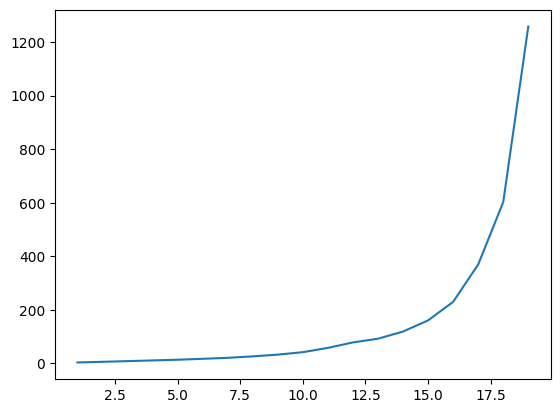

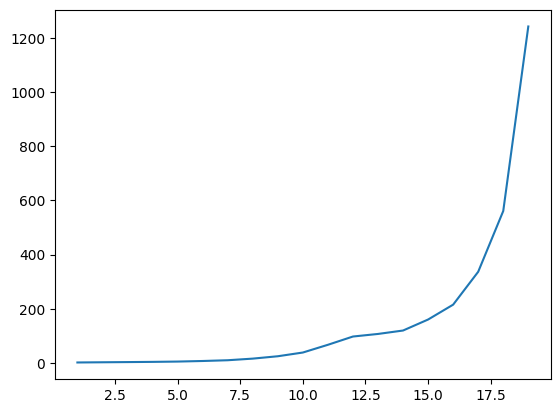

In [21]:
num_mean = []
num_std = []
space = range(1,20)
print
alpha=1.15
for num in space:
    cnt_env = cenv.AcntEnv(protocols, num,threshold, decay_rate)
    policy, policy_bin = policy_maker_ct(cnt_env, alpha)
    print(policy,policy_bin,alpha)
    depth_heuristic = batch_heuristic(2000,cnt_env,policy)
    num_mean.append(np.mean(depth_heuristic))
    num_std.append(np.std(depth_heuristic))

print(np.amin(num_mean))
plt.plot(space, num_mean)
plt.show()
plt.plot(space, num_std)
plt.show()

the upper bin size is:
53.0
the lower bin size
49.0
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 5134.61it/s]


the upper bin size is:
53.0
the lower bin size
48.0
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 5063.30it/s]


the upper bin size is:
53.0
the lower bin size
47.0
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 4993.35it/s]


the upper bin size is:
53.0
the lower bin size
46.0
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 4789.73it/s]


the upper bin size is:
52.0
the lower bin size
45.0
[0.995671860589193, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [46.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 4931.86it/s]


the upper bin size is:
52.0
the lower bin size
45.0
[0.8887404082046221, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [46.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 5101.59it/s]


the upper bin size is:
52.0
the lower bin size
44.0
[0.7977349168134977, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [46.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 4683.92it/s]


the upper bin size is:
52.0
the lower bin size
43.0
[0.7193440479914396, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [46.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 4987.54it/s]


the upper bin size is:
52.0
the lower bin size
42.0
[0.6511149584611304, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [46.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 4866.21it/s]


the upper bin size is:
51.0
the lower bin size
41.0
[0.5911920189605977, 0.9546709133109867, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [46.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 4799.32it/s]


the upper bin size is:
51.0
the lower bin size
40.0
[0.5381454823535691, 0.8807690303068045, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [46.0, 42.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 4305.28it/s]


the upper bin size is:
51.0
the lower bin size
39.0
[0.49085593421552026, 0.8148875066984251, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [46.0, 42.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 4672.99it/s]


the upper bin size is:
51.0
the lower bin size
38.0
[0.3676766619754251, 0.681239090909886, 0.9706936946719836, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [47.0, 43.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 4733.59it/s]


the upper bin size is:
51.0
the lower bin size
37.0
[0.3333614873798912, 0.6315747065063716, 0.9068602037906046, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [47.0, 43.0, 39.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 4576.43it/s]


the upper bin size is:
50.0
the lower bin size
36.0
[0.22754953838882977, 0.5865456646471855, 0.8489845053914875, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [48.0, 43.0, 39.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 4395.49it/s]


the upper bin size is:
50.0
the lower bin size
35.0
[0.20254202181523018, 0.5455319513614296, 0.796269697295476, 0.9715889874341251, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [48.0, 43.0, 39.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 3999.61it/s]


the upper bin size is:
50.0
the lower bin size
34.0
[0.10996634704446977, 0.5080194087220192, 0.748054933793027, 0.9158910834989288, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [49.0, 43.0, 39.0, 36.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 4210.32it/s]


the upper bin size is:
50.0
the lower bin size
33.0
[0.023619515597700973, 0.41309004060197557, 0.647950090604085, 0.8647532418742159, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [50.0, 44.0, 40.0, 36.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 3992.01it/s]


the upper bin size is:
50.0
the lower bin size
32.0
[0, 0.38373631241350875, 0.6093602930335129, 0.8176374776806611, 0.9632677577503359, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [50.0, 44.0, 40.0, 36.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 3800.59it/s]


the upper bin size is:
49.0
the lower bin size
31.0
[0, 0.2995639238702389, 0.5736908044682807, 0.7740872307774286, 0.914207175925548, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [49.0, 45.0, 40.0, 36.0, 33.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 3616.46it/s]


the upper bin size is:
49.0
the lower bin size
29.0
[0, 0.27648954470135856, 0.5406222161109303, 0.7337125227108907, 0.8687239281921518, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [49.0, 45.0, 40.0, 36.0, 33.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 3212.63it/s]


the upper bin size is:
49.0
the lower bin size
28.0
[0, 0.200940111459642, 0.46092982513222097, 0.6961782463676264, 0.8264405069324611, 0.9884003685300705, 1, 1, 1, 1, 1, 1, 1, 1, 1] [49.0, 46.0, 41.0, 36.0, 33.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 3281.32it/s]


the upper bin size is:
49.0
the lower bin size
27.0
[0, 0.12946938201613817, 0.4339403003299935, 0.6175435527162834, 0.7870307162438176, 0.94348708739879, 1, 1, 1, 1, 1, 1, 1, 1, 1] [49.0, 47.0, 41.0, 37.0, 33.0, 29.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 2883.95it/s]


the upper bin size is:
49.0
the lower bin size
26.0
[0, 0.061654604499175654, 0.36206802048871733, 0.5862940775878921, 0.7502112404361179, 0.9015258529146357, 1, 1, 1, 1, 1, 1, 1, 1, 1] [49.0, 48.0, 42.0, 37.0, 33.0, 29.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 2585.55it/s]


the upper bin size is:
48.0
the lower bin size
24.0
[0, 0, 0.3399416137761975, 0.5570332054222166, 0.7157348221798169, 0.8622348788067454, 0.9646697389329144, 1, 1, 1, 1, 1, 1, 1, 1] [48.0, 48.0, 42.0, 37.0, 33.0, 29.0, 26.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0] 1.15


100%|██████████| 2000/2000 [00:00<00:00, 2035.51it/s]


the upper bin size is:
48.0
the lower bin size
23.0
[0, 0, 0.2745162248035733, 0.48916366619246404, 0.6833847028468126, 0.825367136582162, 0.9246432124753654, 1, 1, 1, 1, 1, 1, 1, 1] [48.0, 48.0, 43.0, 38.0, 33.0, 29.0, 26.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0] 1.15


100%|██████████| 2000/2000 [00:01<00:00, 1878.49it/s]


the upper bin size is:
48.0
the lower bin size
22.0
[0, 0, 0.21212990146554622, 0.4645590550955382, 0.6167798775643999, 0.7572974070458246, 0.8870114354639937, 0.9777092731532574, 1, 1, 1, 1, 1, 1, 1] [48.0, 48.0, 44.0, 38.0, 34.0, 30.0, 26.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0] 1.15


100%|██████████| 2000/2000 [00:01<00:00, 1649.38it/s]


the upper bin size is:
48.0
the lower bin size
20.0
[0, 0, 0.1525006607855913, 0.4025491389020322, 0.589183228285213, 0.725619335748505, 0.8515657367852336, 0.9396291974461785, 1, 1, 1, 1, 1, 1, 1] [48.0, 48.0, 45.0, 39.0, 34.0, 30.0, 26.0, 23.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0] 1.15


100%|██████████| 2000/2000 [00:01<00:00, 1608.79it/s]


the upper bin size is:
48.0
the lower bin size
19.0
[0, 0, 0.13878760449997654, 0.3817782626695823, 0.5631444543685603, 0.6957295426695819, 0.8181210049673705, 0.9036988034322403, 1, 1, 1, 1, 1, 1, 1] [48.0, 48.0, 45.0, 39.0, 34.0, 30.0, 26.0, 23.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0] 1.15


100%|██████████| 2000/2000 [00:01<00:00, 1459.09it/s]


the upper bin size is:
47.0
the lower bin size
17.0
[0, 0, 0.040538664164671126, 0.3247037862482299, 0.5046545622799871, 0.6674807578381294, 0.786512454504214, 0.8697410585014207, 0.9732222442715738, 1, 1, 1, 1, 1, 1] [47.0, 47.0, 47.0, 40.0, 35.0, 30.0, 26.0, 23.0, 19.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0] 1.15


100%|██████████| 2000/2000 [00:01<00:00, 1398.81it/s]


the upper bin size is:
47.0
the lower bin size
16.0
[0, 0, 0, 0.2699428824477558, 0.48226557270253206, 0.6103012376588774, 0.7284930529005621, 0.8375978495592709, 0.9383142708241146, 1, 1, 1, 1, 1, 1] [47.0, 47.0, 47.0, 41.0, 35.0, 31.0, 27.0, 23.0, 19.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0] 1.15


100%|██████████| 2000/2000 [00:01<00:00, 1344.88it/s]


the upper bin size is:
47.0
the lower bin size
14.0
[0, 0, 0, 0.21730045240680346, 0.4282756048097557, 0.5857456912018307, 0.7008618829985644, 0.8071275213799092, 0.905223069228939, 0.9738128292213478, 1, 1, 1, 1, 1] [47.0, 47.0, 47.0, 42.0, 36.0, 31.0, 27.0, 23.0, 19.0, 16.0, 14.0, 14.0, 14.0, 14.0, 14.0] 1.15


100%|██████████| 2000/2000 [00:01<00:00, 1351.76it/s]


the upper bin size is:
47.0
the lower bin size
13.0
[0, 0, 0, 0.20333510276846684, 0.4089594360887356, 0.5624357159418812, 0.6746322941785529, 0.7782027895574721, 0.8738104068451137, 0.9406605714753961, 1, 1, 1, 1, 1] [47.0, 47.0, 47.0, 42.0, 36.0, 31.0, 27.0, 23.0, 19.0, 16.0, 13.0, 13.0, 13.0, 13.0, 13.0] 1.15


100%|██████████| 2000/2000 [00:01<00:00, 1273.44it/s]


the upper bin size is:
47.0
the lower bin size
11.0
[0, 0, 0, 0.11768573713641191, 0.35882439997486826, 0.5115281842777167, 0.6231600409982734, 0.7507089631962153, 0.8213356260696986, 0.9091483547486782, 0.9705482257564758, 1, 1, 1, 1] [47.0, 47.0, 47.0, 44.0, 37.0, 32.0, 28.0, 23.0, 20.0, 16.0, 13.0, 11.0, 11.0, 11.0, 11.0] 1.15


100%|██████████| 2000/2000 [00:01<00:00, 1247.11it/s]


the upper bin size is:
46.0
the lower bin size
9.0
[0, 0, 0, 0.07041146867584194, 0.3104832835368597, 0.46251147429733264, 0.6000722698937174, 0.7006340673271486, 0.7934643063599705, 0.8791574174501472, 0.9390752226060325, 1, 1, 1, 1] [46.0, 46.0, 46.0, 45.0, 38.0, 33.0, 28.0, 24.0, 20.0, 16.0, 13.0, 9.0, 9.0, 9.0, 9.0] 1.15


100%|██████████| 2000/2000 [00:02<00:00, 964.21it/s] 


the upper bin size is:
46.0
the lower bin size
7.0
[0, 0, 0, 0.02464786368283535, 0.26379688824485886, 0.44375418926900034, 0.5780728112318003, 0.6762644652913795, 0.7669067862325186, 0.850580194367708, 0.9090857953616701, 0.9818279618078825, 1, 1, 1] [46.0, 46.0, 46.0, 46.0, 39.0, 33.0, 28.0, 24.0, 20.0, 16.0, 13.0, 9.0, 7.0, 7.0, 7.0] 1.15


100%|██████████| 2000/2000 [00:02<00:00, 938.42it/s]


the upper bin size is:
46.0
the lower bin size
6.0
[0, 0, 0, 0, 0.2186385926314648, 0.39800380926558, 0.5318805043996186, 0.6530171475598895, 0.7415723097951471, 0.823319027611434, 0.8804774601614562, 0.9515446425118677, 1, 1, 1] [46.0, 46.0, 46.0, 46.0, 40.0, 34.0, 29.0, 24.0, 20.0, 16.0, 13.0, 9.0, 6.0, 6.0, 6.0] 1.15


100%|██████████| 2000/2000 [00:02<00:00, 794.57it/s]


the upper bin size is:
46.0
the lower bin size
4.0
[0, 0, 0, 0, 0.1748929320513782, 0.35376285117276535, 0.48726986039246406, 0.6080719979045194, 0.6963826247029881, 0.7779036078603045, 0.8531569599863323, 0.9226245594542586, 0.971197263101185, 1, 1] [46.0, 46.0, 46.0, 46.0, 41.0, 35.0, 30.0, 25.0, 21.0, 17.0, 13.0, 9.0, 6.0, 4.0, 4.0] 1.15


100%|██████████| 2000/2000 [00:02<00:00, 678.17it/s]


the upper bin size is:
46.0
the lower bin size
2.0
[0, 0, 0, 0, 0.10057185439332633, 0.31092076842921684, 0.4692062680777452, 0.587349239040793, 0.673715921224201, 0.7534424173308847, 0.8270392491270943, 0.8784991689684376, 0.9424811807897332, 0.9872182858967672, 1] [46.0, 46.0, 46.0, 46.0, 43.0, 36.0, 30.0, 25.0, 21.0, 17.0, 13.0, 10.0, 6.0, 3.0, 2.0] 1.15


100%|██████████| 2000/2000 [00:03<00:00, 572.37it/s]


the upper bin size is:
45.0
the lower bin size
0.0
[0, 0, 0, 0, 0.05940019572186017, 0.2693763236704238, 0.42738130543577196, 0.5453149002007424, 0.6520256295875774, 0.730034939624271, 0.8020466088894853, 0.8523981612265535, 0.9150020989470828, 0.9587756356364269, 1.0] [45.0, 45.0, 45.0, 45.0, 44.0, 37.0, 31.0, 26.0, 21.0, 17.0, 13.0, 10.0, 6.0, 3.0, 0.0] 1.15


100%|██████████| 2000/2000 [00:04<00:00, 458.90it/s]

38.8195


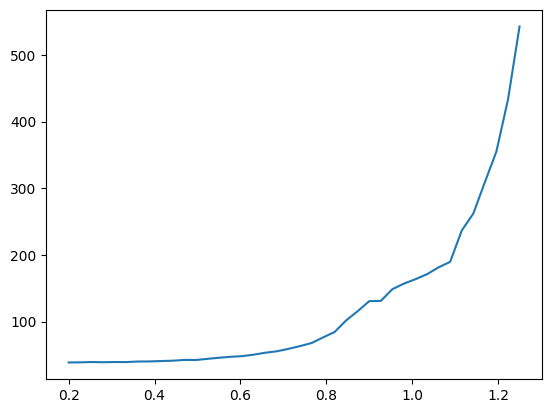

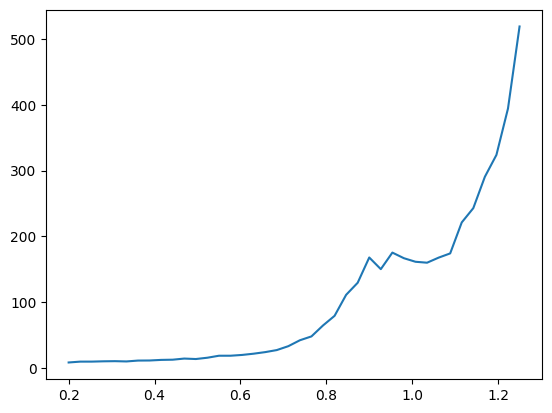

In [93]:
lam_mean = []
lam_std = []
space = np.linspace(0.2,1.25,40)
alpha=1.15
for lam in space:
    protocols = [[0.1,0.4],[1-lam*0.1,1-lam*0.4]]
    num_qubits = 15
    threshold = 1/2
    decay_rate = 0.02
    cnt_env = cenv.AcntEnv(protocols, num_qubits,threshold, decay_rate)
    policy, policy_bin = policy_maker_ct(cnt_env, alpha)
    print(policy,policy_bin,alpha)
    depth_heuristic = batch_heuristic(2000,cnt_env,policy)
    lam_mean.append(np.mean(depth_heuristic))
    lam_std.append(np.std(depth_heuristic))

print(np.amin(lam_mean))
plt.plot(space, lam_mean)
plt.show()
plt.plot(space, lam_std)
plt.show()

### interpolation(no knowledge)

In [6]:
import intp_env as ienv

protocols = [[0.4, 0.2],[0.6, 0.8]]
num_qubits = 4
threshold = 1/2
decay_rate = 0.2

int_env = ienv.IntpEnv(protocols, num_qubits ,threshold, decay_rate)

the upper bin size is:
3.0
the lower bin size
1.0


Text(0.5, 1.0, 'Interpolation between $(p_1=0.4,F_1=0.6)$, $(p_2=0.2,F_2=0.8)$')

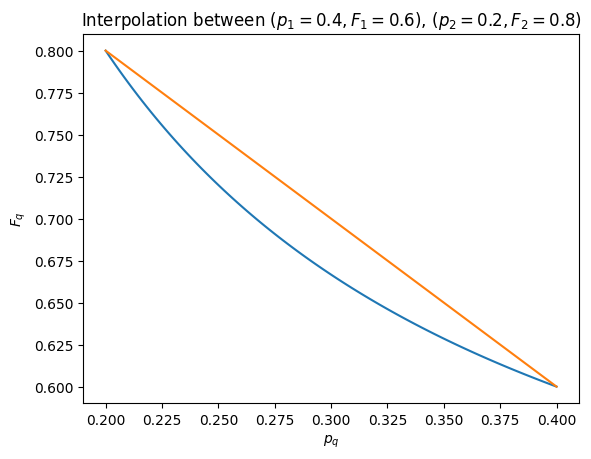

In [12]:
#plot for trade-off function in interpolation

p = np.linspace(0.2,0.4,100)
p1, p2 = 0.4, 0.2
f1, f2 = 0.6, 0.8
f=[]
linear_f=[]
for i in p:
    fidelity = (p1*p2*(f2-f1))/(i*(p1-p2))+(p1*f1-p2*f2)/(p1-p2)
    f.append(fidelity)
    linear_f.append(1-i)
plt.plot(p,f)
plt.plot(p,linear_f)
plt.ylabel(r'$F_q$')
plt.xlabel(r'$p_q$')
plt.title(r'Interpolation between $(p_1=0.4,F_1=0.6)$, $(p_2=0.2,F_2=0.8)$')

In [110]:
def policy_maker_it(env, p,alpha = 1):
    ahead = 0
    policy = []
    policy_bin = []
    p_min = np.min(p)
    p_max = np.max(p)
    for i in range(num_qubits):
        n = alpha*ahead
        tp_n = np.floor(n)
        f_q = (env.threshold - 1/4)*np.exp(env.decay_rate*tp_n) + 1/4
        q = p_min*(env.F_max-f_q)/(p_min*(env.F_max-f_q)+p_max*(f_q-env.F_min))
        if q<0:
            q = 0
            tp_n = env.bin_size
        elif q>1:
            q = 1
            tp_n = env.bin_size_min
        #log
        policy.append(q)
        policy_bin.append(tp_n)
        ahead = ahead + alpha/(env.p_max*policy[i]+env.p_min*(1-policy[i]))
    return policy[::-1], policy_bin[::-1]

policy = policy_maker_it(int_env, protocols[0])[0]
print(policy)
test = batch_heuristic(1,int_env,policy)
print('can run one batch')
depth_heuristic = batch_heuristic(2000,int_env,policy)
print(np.mean(depth_heuristic))
print(np.std(depth_heuristic))

[0, 0.09653562887368966, 0.8914489216651209, 1]


100%|██████████| 1/1 [00:00<00:00, 1000.07it/s]


can run one batch


100%|██████████| 2000/2000 [00:01<00:00, 1129.58it/s]

88.722
86.67940768140954


[0.09653562887368966, 0.5824985156075003, 1, 1] [5.0, 3.0, 1.0, 1.0] 0.8


100%|██████████| 2000/2000 [00:02<00:00, 878.14it/s]


[0.09653562887368966, 0.5824985156075003, 1, 1] [5.0, 3.0, 1.0, 1.0] 0.8090909090909091


100%|██████████| 2000/2000 [00:02<00:00, 904.73it/s]


[0.09653562887368966, 0.5824985156075003, 1, 1] [5.0, 3.0, 1.0, 1.0] 0.8181818181818182


100%|██████████| 2000/2000 [00:02<00:00, 844.21it/s]


[0.09653562887368966, 0.5824985156075003, 1, 1] [5.0, 3.0, 1.0, 1.0] 0.8272727272727273


100%|██████████| 2000/2000 [00:02<00:00, 889.87it/s]


[0.09653562887368966, 0.5824985156075003, 1, 1] [5.0, 3.0, 1.0, 1.0] 0.8363636363636364


100%|██████████| 2000/2000 [00:02<00:00, 917.98it/s]


[0.09653562887368966, 0.5824985156075003, 1, 1] [5.0, 3.0, 1.0, 1.0] 0.8454545454545455


100%|██████████| 2000/2000 [00:02<00:00, 940.05it/s] 


[0.09653562887368966, 0.5824985156075003, 1, 1] [5.0, 3.0, 1.0, 1.0] 0.8545454545454546


100%|██████████| 2000/2000 [00:02<00:00, 837.32it/s]


[0, 0.5824985156075003, 1, 1] [5.0, 3.0, 1.0, 1.0] 0.8636363636363636


100%|██████████| 2000/2000 [00:01<00:00, 1039.29it/s]


[0, 0.5824985156075003, 1, 1] [5.0, 3.0, 1.0, 1.0] 0.8727272727272728


100%|██████████| 2000/2000 [00:01<00:00, 1105.18it/s]


[0, 0.5824985156075003, 1, 1] [5.0, 3.0, 1.0, 1.0] 0.8818181818181818


100%|██████████| 2000/2000 [00:01<00:00, 1129.91it/s]


[0, 0.5824985156075003, 1, 1] [5.0, 3.0, 1.0, 1.0] 0.890909090909091


100%|██████████| 2000/2000 [00:01<00:00, 1148.99it/s]


[0, 0.31929334294469197, 0.8914489216651209, 1] [5.0, 4.0, 2.0, 1.0] 0.9


100%|██████████| 2000/2000 [00:01<00:00, 1343.89it/s]


[0, 0.31929334294469197, 0.8914489216651209, 1] [5.0, 4.0, 2.0, 1.0] 0.9090909090909092


100%|██████████| 2000/2000 [00:01<00:00, 1261.10it/s]


[0, 0.31929334294469197, 0.8914489216651209, 1] [5.0, 4.0, 2.0, 1.0] 0.9181818181818182


100%|██████████| 2000/2000 [00:01<00:00, 1274.35it/s]


[0, 0.31929334294469197, 0.8914489216651209, 1] [5.0, 4.0, 2.0, 1.0] 0.9272727272727272


100%|██████████| 2000/2000 [00:01<00:00, 1239.89it/s]


[0, 0.31929334294469197, 0.8914489216651209, 1] [5.0, 4.0, 2.0, 1.0] 0.9363636363636364


100%|██████████| 2000/2000 [00:01<00:00, 1178.60it/s]


[0, 0.31929334294469197, 0.8914489216651209, 1] [5.0, 4.0, 2.0, 1.0] 0.9454545454545455


100%|██████████| 2000/2000 [00:01<00:00, 1255.10it/s]


[0, 0.31929334294469197, 0.8914489216651209, 1] [5.0, 4.0, 2.0, 1.0] 0.9545454545454546


100%|██████████| 2000/2000 [00:01<00:00, 1293.96it/s]


[0, 0.31929334294469197, 0.8914489216651209, 1] [5.0, 4.0, 2.0, 1.0] 0.9636363636363636


100%|██████████| 2000/2000 [00:01<00:00, 1342.26it/s]


[0, 0.31929334294469197, 0.8914489216651209, 1] [5.0, 4.0, 2.0, 1.0] 0.9727272727272728


100%|██████████| 2000/2000 [00:01<00:00, 1291.19it/s]


[0, 0.31929334294469197, 0.8914489216651209, 1] [5.0, 4.0, 2.0, 1.0] 0.9818181818181819


100%|██████████| 2000/2000 [00:01<00:00, 1277.52it/s]


[0, 0.09653562887368966, 0.8914489216651209, 1] [5.0, 5.0, 2.0, 1.0] 0.990909090909091


100%|██████████| 2000/2000 [00:01<00:00, 1203.48it/s]


[0, 0.09653562887368966, 0.8914489216651209, 1] [5.0, 5.0, 2.0, 1.0] 1.0


100%|██████████| 2000/2000 [00:01<00:00, 1133.97it/s]


[0, 0.09653562887368966, 0.8914489216651209, 1] [5.0, 5.0, 2.0, 1.0] 1.009090909090909


100%|██████████| 2000/2000 [00:01<00:00, 1219.36it/s]


[0, 0.09653562887368966, 0.8914489216651209, 1] [5.0, 5.0, 2.0, 1.0] 1.0181818181818183


100%|██████████| 2000/2000 [00:01<00:00, 1113.25it/s]


[0, 0.09653562887368966, 0.8914489216651209, 1] [5.0, 5.0, 2.0, 1.0] 1.0272727272727273


100%|██████████| 2000/2000 [00:01<00:00, 1156.71it/s]


[0, 0.09653562887368966, 0.8914489216651209, 1] [5.0, 5.0, 2.0, 1.0] 1.0363636363636364


100%|██████████| 2000/2000 [00:01<00:00, 1078.42it/s]


[0, 0.09653562887368966, 0.8914489216651209, 1] [5.0, 5.0, 2.0, 1.0] 1.0454545454545454


100%|██████████| 2000/2000 [00:01<00:00, 1085.19it/s]


[0, 0.09653562887368966, 0.8914489216651209, 1] [5.0, 5.0, 2.0, 1.0] 1.0545454545454547


100%|██████████| 2000/2000 [00:01<00:00, 1159.04it/s]


[0, 0.09653562887368966, 0.8914489216651209, 1] [5.0, 5.0, 2.0, 1.0] 1.0636363636363637


100%|██████████| 2000/2000 [00:01<00:00, 1174.73it/s]


[0, 0.09653562887368966, 0.8914489216651209, 1] [5.0, 5.0, 2.0, 1.0] 1.0727272727272728


100%|██████████| 2000/2000 [00:01<00:00, 1261.82it/s]


[0, 0, 0.8914489216651209, 1] [5.0, 5.0, 2.0, 1.0] 1.0818181818181818


100%|██████████| 2000/2000 [00:01<00:00, 1181.47it/s]


[0, 0, 0.8914489216651209, 1] [5.0, 5.0, 2.0, 1.0] 1.0909090909090908


100%|██████████| 2000/2000 [00:01<00:00, 1226.19it/s]


[0, 0, 0.5824985156075003, 1] [5.0, 5.0, 3.0, 1.0] 1.1


100%|██████████| 2000/2000 [00:01<00:00, 1887.71it/s]


[0, 0, 0.5824985156075003, 1] [5.0, 5.0, 3.0, 1.0] 1.1090909090909091


100%|██████████| 2000/2000 [00:00<00:00, 2019.03it/s]


[0, 0, 0.5824985156075003, 1] [5.0, 5.0, 3.0, 1.0] 1.1181818181818182


100%|██████████| 2000/2000 [00:01<00:00, 1804.29it/s]


[0, 0, 0.5824985156075003, 1] [5.0, 5.0, 3.0, 1.0] 1.1272727272727274


100%|██████████| 2000/2000 [00:01<00:00, 1945.59it/s]


[0, 0, 0.5824985156075003, 1] [5.0, 5.0, 3.0, 1.0] 1.1363636363636365


100%|██████████| 2000/2000 [00:01<00:00, 1988.08it/s]


[0, 0, 0.5824985156075003, 1] [5.0, 5.0, 3.0, 1.0] 1.1454545454545455


100%|██████████| 2000/2000 [00:01<00:00, 1815.51it/s]


[0, 0, 0.5824985156075003, 1] [5.0, 5.0, 3.0, 1.0] 1.1545454545454545


100%|██████████| 2000/2000 [00:01<00:00, 1902.79it/s]


[0, 0, 0.5824985156075003, 1] [5.0, 5.0, 3.0, 1.0] 1.1636363636363636


100%|██████████| 2000/2000 [00:01<00:00, 1862.13it/s]


[0, 0, 0.5824985156075003, 1] [5.0, 5.0, 3.0, 1.0] 1.1727272727272728


100%|██████████| 2000/2000 [00:00<00:00, 2002.92it/s]


[0, 0, 0.5824985156075003, 1] [5.0, 5.0, 3.0, 1.0] 1.1818181818181819


100%|██████████| 2000/2000 [00:01<00:00, 1971.64it/s]


[0, 0, 0.5824985156075003, 1] [5.0, 5.0, 3.0, 1.0] 1.190909090909091


100%|██████████| 2000/2000 [00:00<00:00, 2003.48it/s]


[0, 0, 0.5824985156075003, 1] [5.0, 5.0, 3.0, 1.0] 1.2


100%|██████████| 2000/2000 [00:01<00:00, 1953.99it/s]


[0, 0, 0.5824985156075003, 1] [5.0, 5.0, 3.0, 1.0] 1.209090909090909


100%|██████████| 2000/2000 [00:01<00:00, 1763.67it/s]


[0, 0, 0.5824985156075003, 1] [5.0, 5.0, 3.0, 1.0] 1.2181818181818183


100%|██████████| 2000/2000 [00:01<00:00, 1870.89it/s]


[0, 0, 0.5824985156075003, 1] [5.0, 5.0, 3.0, 1.0] 1.2272727272727273


100%|██████████| 2000/2000 [00:01<00:00, 1976.28it/s]


[0, 0, 0.5824985156075003, 1] [5.0, 5.0, 3.0, 1.0] 1.2363636363636363


100%|██████████| 2000/2000 [00:00<00:00, 2041.42it/s]


[0, 0, 0.5824985156075003, 1] [5.0, 5.0, 3.0, 1.0] 1.2454545454545456


100%|██████████| 2000/2000 [00:01<00:00, 1904.73it/s]


[0, 0, 0.5824985156075003, 1] [5.0, 5.0, 3.0, 1.0] 1.2545454545454546


100%|██████████| 2000/2000 [00:01<00:00, 1908.31it/s]


[0, 0, 0.5824985156075003, 1] [5.0, 5.0, 3.0, 1.0] 1.2636363636363637


100%|██████████| 2000/2000 [00:01<00:00, 1945.43it/s]


[0, 0, 0.31929334294469197, 1] [5.0, 5.0, 4.0, 1.0] 1.2727272727272727


100%|██████████| 2000/2000 [00:01<00:00, 1839.89it/s]


[0, 0, 0.31929334294469197, 1] [5.0, 5.0, 4.0, 1.0] 1.2818181818181817


100%|██████████| 2000/2000 [00:01<00:00, 1969.67it/s]


[0, 0, 0.31929334294469197, 1] [5.0, 5.0, 4.0, 1.0] 1.290909090909091


100%|██████████| 2000/2000 [00:01<00:00, 1949.27it/s]


[0, 0, 0.31929334294469197, 1] [5.0, 5.0, 4.0, 1.0] 1.3


100%|██████████| 2000/2000 [00:01<00:00, 1845.97it/s]


[0, 0, 0.31929334294469197, 1] [5.0, 5.0, 4.0, 1.0] 1.309090909090909


100%|██████████| 2000/2000 [00:01<00:00, 1878.90it/s]


[0, 0, 0.31929334294469197, 1] [5.0, 5.0, 4.0, 1.0] 1.3181818181818183


100%|██████████| 2000/2000 [00:01<00:00, 1913.78it/s]


[0, 0, 0.31929334294469197, 1] [5.0, 5.0, 4.0, 1.0] 1.3272727272727272


100%|██████████| 2000/2000 [00:01<00:00, 1862.02it/s]


[0, 0, 0.31929334294469197, 1] [5.0, 5.0, 4.0, 1.0] 1.3363636363636364


100%|██████████| 2000/2000 [00:01<00:00, 1938.75it/s]


[0, 0, 0.31929334294469197, 1] [5.0, 5.0, 4.0, 1.0] 1.3454545454545455


100%|██████████| 2000/2000 [00:01<00:00, 1839.93it/s]


[0, 0, 0.31929334294469197, 1] [5.0, 5.0, 4.0, 1.0] 1.3545454545454545


100%|██████████| 2000/2000 [00:01<00:00, 1880.45it/s]


[0, 0, 0.31929334294469197, 1] [5.0, 5.0, 4.0, 1.0] 1.3636363636363638


100%|██████████| 2000/2000 [00:01<00:00, 1876.17it/s]


[0, 0, 0.31929334294469197, 1] [5.0, 5.0, 4.0, 1.0] 1.3727272727272728


100%|██████████| 2000/2000 [00:00<00:00, 2003.95it/s]


[0, 0, 0.31929334294469197, 1] [5.0, 5.0, 4.0, 1.0] 1.3818181818181818


100%|██████████| 2000/2000 [00:01<00:00, 1815.06it/s]


[0, 0, 0.31929334294469197, 1] [5.0, 5.0, 4.0, 1.0] 1.3909090909090909


100%|██████████| 2000/2000 [00:01<00:00, 1774.56it/s]


[0, 0, 0.31929334294469197, 1] [5.0, 5.0, 4.0, 1.0] 1.4


100%|██████████| 2000/2000 [00:01<00:00, 1640.76it/s]


[0, 0, 0.31929334294469197, 1] [5.0, 5.0, 4.0, 1.0] 1.4090909090909092


100%|██████████| 2000/2000 [00:01<00:00, 1815.04it/s]


[0, 0, 0.09653562887368966, 1] [5.0, 5.0, 5.0, 1.0] 1.4181818181818182


100%|██████████| 2000/2000 [00:01<00:00, 1686.30it/s]


[0, 0, 0.09653562887368966, 1] [5.0, 5.0, 5.0, 1.0] 1.4272727272727272


100%|██████████| 2000/2000 [00:01<00:00, 1538.14it/s]


[0, 0, 0.09653562887368966, 1] [5.0, 5.0, 5.0, 1.0] 1.4363636363636365


100%|██████████| 2000/2000 [00:01<00:00, 1581.00it/s]


[0, 0, 0.09653562887368966, 1] [5.0, 5.0, 5.0, 1.0] 1.4454545454545453


100%|██████████| 2000/2000 [00:01<00:00, 1646.02it/s]


[0, 0, 0.09653562887368966, 1] [5.0, 5.0, 5.0, 1.0] 1.4545454545454546


100%|██████████| 2000/2000 [00:01<00:00, 1705.69it/s]


[0, 0, 0.09653562887368966, 1] [5.0, 5.0, 5.0, 1.0] 1.4636363636363636


100%|██████████| 2000/2000 [00:01<00:00, 1673.05it/s]


[0, 0, 0.09653562887368966, 1] [5.0, 5.0, 5.0, 1.0] 1.4727272727272727


100%|██████████| 2000/2000 [00:01<00:00, 1706.59it/s]


[0, 0, 0.09653562887368966, 1] [5.0, 5.0, 5.0, 1.0] 1.481818181818182


100%|██████████| 2000/2000 [00:01<00:00, 1524.49it/s]


[0, 0, 0.09653562887368966, 1] [5.0, 5.0, 5.0, 1.0] 1.490909090909091


100%|██████████| 2000/2000 [00:01<00:00, 1644.68it/s]


[0, 0, 0.09653562887368966, 1] [5.0, 5.0, 5.0, 1.0] 1.5


100%|██████████| 2000/2000 [00:01<00:00, 1605.13it/s]


[0, 0, 0.09653562887368966, 1] [5.0, 5.0, 5.0, 1.0] 1.5090909090909093


100%|██████████| 2000/2000 [00:01<00:00, 1476.05it/s]


[0, 0, 0.09653562887368966, 1] [5.0, 5.0, 5.0, 1.0] 1.518181818181818


100%|██████████| 2000/2000 [00:01<00:00, 1606.97it/s]


[0, 0, 0.09653562887368966, 1] [5.0, 5.0, 5.0, 1.0] 1.5272727272727273


100%|██████████| 2000/2000 [00:01<00:00, 1574.12it/s]


[0, 0, 0.09653562887368966, 1] [5.0, 5.0, 5.0, 1.0] 1.5363636363636364


100%|██████████| 2000/2000 [00:01<00:00, 1533.67it/s]


[0, 0, 0.09653562887368966, 1] [5.0, 5.0, 5.0, 1.0] 1.5454545454545454


100%|██████████| 2000/2000 [00:01<00:00, 1679.21it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.5545454545454547


100%|██████████| 2000/2000 [00:01<00:00, 1514.45it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.5636363636363635


100%|██████████| 2000/2000 [00:01<00:00, 1584.13it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.5727272727272728


100%|██████████| 2000/2000 [00:01<00:00, 1642.54it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.5818181818181818


100%|██████████| 2000/2000 [00:01<00:00, 1559.38it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.5909090909090908


100%|██████████| 2000/2000 [00:01<00:00, 1576.01it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6


100%|██████████| 2000/2000 [00:01<00:00, 1578.36it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6090909090909091


100%|██████████| 2000/2000 [00:01<00:00, 1578.51it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6181818181818182


100%|██████████| 2000/2000 [00:01<00:00, 1476.81it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6272727272727274


100%|██████████| 2000/2000 [00:01<00:00, 1414.37it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6363636363636362


100%|██████████| 2000/2000 [00:01<00:00, 1420.00it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6454545454545455


100%|██████████| 2000/2000 [00:01<00:00, 1473.81it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6545454545454545


100%|██████████| 2000/2000 [00:01<00:00, 1525.20it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6636363636363636


100%|██████████| 2000/2000 [00:01<00:00, 1479.96it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6727272727272728


100%|██████████| 2000/2000 [00:01<00:00, 1585.84it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6818181818181817


100%|██████████| 2000/2000 [00:01<00:00, 1562.92it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.690909090909091


100%|██████████| 2000/2000 [00:01<00:00, 1579.68it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.7


100%|██████████| 2000/2000 [00:01<00:00, 1528.21it/s]


56.187


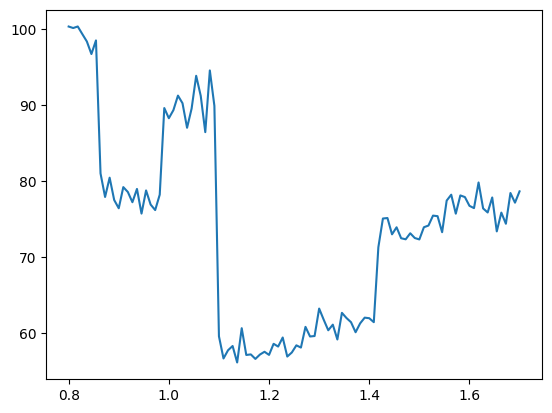

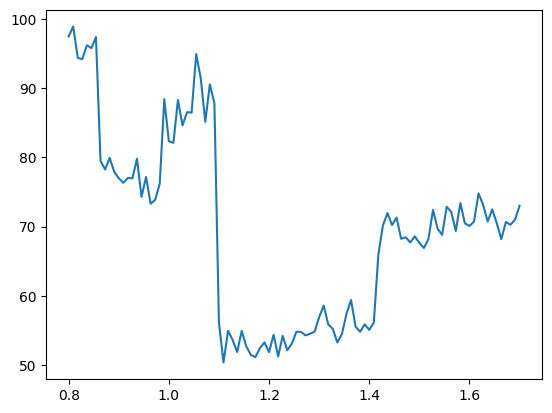

In [111]:
h_mean_int = []
h_std_int = []
space = np.linspace(0.8,1.7,100)
for alpha in space:
    policy, policy_bin = policy_maker_it(int_env, protocols[0], alpha)
    print(policy,policy_bin,alpha)
    depth_heuristic = batch_heuristic(2000,int_env,policy)
    h_mean_int.append(np.mean(depth_heuristic))
    h_std_int.append(np.std(depth_heuristic))

print(np.amin(h_mean_int))
plt.plot(space, h_mean_int)
plt.show()
plt.plot(space, h_std_int)
plt.show()

### interpolation(with knowledge)

In [21]:
import intp_alt_env as iaenv

protocols = [[0.3, 0.6],[0.75, 0.51]]
num_qubits = 20
threshold = 1/2
decay_rate = 0.02

int_env_alt = iaenv.IntpAltEnv(protocols, num_qubits ,threshold, decay_rate)

the upper bin size is:
34.0
the lower bin size
1.0


In [18]:
def policy_maker_it_alt(env, p,alpha = 1):
    ahead = 0
    policy = []
    policy_bin =[]
    p_min = np.min(p)
    p_max = np.max(p)
    for i in range(num_qubits):
        n = alpha*ahead
        tp_n = np.floor(n)
        q = p_min*(env.bin_size-tp_n)/(p_min*(env.bin_size-tp_n)+p_max*(tp_n-env.bin_size_min))
        if q<0:
            q = 0
            tp_n = env.bin_size
        elif q>1:
            q = 1
            tp_n = env.bin_size_min
        policy.append(q)
        policy_bin.append(tp_n)
        ahead = ahead + alpha/(env.p_max*policy[i]+env.p_min*(1-policy[i]))
    return policy[::-1], policy_bin[::-1]

policy = policy_maker_it_alt(int_env_alt,protocols[0])[0]
print(policy)
test = batch_heuristic(1,int_env_alt,policy)
print('can run one batch')
depth_heuristic = batch_heuristic(2000,int_env_alt,policy)
print(np.mean(depth_heuristic))
print(np.std(depth_heuristic))

[0, 0.0, 0.6000000000000001, 1]


100%|██████████| 1/1 [00:00<00:00, 1075.74it/s]


can run one batch


100%|██████████| 2000/2000 [00:01<00:00, 1075.77it/s]

80.649
76.02376469894133


[0.0, 0.3333333333333333, 1.0, 1] [5.0, 3.0, 1.0, 1.0] 0.8


100%|██████████| 2000/2000 [00:03<00:00, 626.34it/s]


[0.0, 0.3333333333333333, 1.0, 1] [5.0, 3.0, 1.0, 1.0] 0.8090909090909091


100%|██████████| 2000/2000 [00:03<00:00, 626.08it/s]


[0.0, 0.3333333333333333, 1.0, 1] [5.0, 3.0, 1.0, 1.0] 0.8181818181818182


100%|██████████| 2000/2000 [00:03<00:00, 578.92it/s]


[0.0, 0.3333333333333333, 1.0, 1] [5.0, 3.0, 1.0, 1.0] 0.8272727272727273


100%|██████████| 2000/2000 [00:03<00:00, 636.42it/s]


[0, 0.3333333333333333, 1.0, 1] [5.0, 3.0, 1.0, 1.0] 0.8363636363636364


100%|██████████| 2000/2000 [00:03<00:00, 630.52it/s]


[0, 0.3333333333333333, 1.0, 1] [5.0, 3.0, 1.0, 1.0] 0.8454545454545455


100%|██████████| 2000/2000 [00:03<00:00, 619.28it/s]


[0, 0.3333333333333333, 1.0, 1] [5.0, 3.0, 1.0, 1.0] 0.8545454545454546


100%|██████████| 2000/2000 [00:03<00:00, 656.35it/s]


[0, 0.3333333333333333, 1.0, 1] [5.0, 3.0, 1.0, 1.0] 0.8636363636363636


100%|██████████| 2000/2000 [00:03<00:00, 627.52it/s]


[0, 0.3333333333333333, 1.0, 1] [5.0, 3.0, 1.0, 1.0] 0.8727272727272728


100%|██████████| 2000/2000 [00:03<00:00, 632.69it/s]


[0, 0.3333333333333333, 1.0, 1] [5.0, 3.0, 1.0, 1.0] 0.8818181818181818


100%|██████████| 2000/2000 [00:03<00:00, 579.60it/s]


[0, 0.3333333333333333, 1.0, 1] [5.0, 3.0, 1.0, 1.0] 0.890909090909091


100%|██████████| 2000/2000 [00:03<00:00, 613.53it/s]


[0, 0.14285714285714285, 0.6000000000000001, 1] [5.0, 4.0, 2.0, 1.0] 0.9


100%|██████████| 2000/2000 [00:02<00:00, 968.96it/s]


[0, 0.14285714285714285, 0.6000000000000001, 1] [5.0, 4.0, 2.0, 1.0] 0.9090909090909092


100%|██████████| 2000/2000 [00:02<00:00, 943.16it/s] 


[0, 0.14285714285714285, 0.6000000000000001, 1] [5.0, 4.0, 2.0, 1.0] 0.9181818181818182


100%|██████████| 2000/2000 [00:02<00:00, 870.29it/s]


[0, 0.14285714285714285, 0.6000000000000001, 1] [5.0, 4.0, 2.0, 1.0] 0.9272727272727272


100%|██████████| 2000/2000 [00:02<00:00, 899.05it/s]


[0, 0.14285714285714285, 0.6000000000000001, 1] [5.0, 4.0, 2.0, 1.0] 0.9363636363636364


100%|██████████| 2000/2000 [00:02<00:00, 906.12it/s] 


[0, 0.0, 0.6000000000000001, 1] [5.0, 5.0, 2.0, 1.0] 0.9454545454545455


100%|██████████| 2000/2000 [00:01<00:00, 1116.66it/s]


[0, 0.0, 0.6000000000000001, 1] [5.0, 5.0, 2.0, 1.0] 0.9545454545454546


100%|██████████| 2000/2000 [00:01<00:00, 1100.88it/s]


[0, 0.0, 0.6000000000000001, 1] [5.0, 5.0, 2.0, 1.0] 0.9636363636363636


100%|██████████| 2000/2000 [00:01<00:00, 1100.33it/s]


[0, 0.0, 0.6000000000000001, 1] [5.0, 5.0, 2.0, 1.0] 0.9727272727272728


100%|██████████| 2000/2000 [00:01<00:00, 1105.56it/s]


[0, 0.0, 0.6000000000000001, 1] [5.0, 5.0, 2.0, 1.0] 0.9818181818181819


100%|██████████| 2000/2000 [00:01<00:00, 1111.03it/s]


[0, 0.0, 0.6000000000000001, 1] [5.0, 5.0, 2.0, 1.0] 0.990909090909091


100%|██████████| 2000/2000 [00:01<00:00, 1129.92it/s]


[0, 0.0, 0.6000000000000001, 1] [5.0, 5.0, 2.0, 1.0] 1.0


100%|██████████| 2000/2000 [00:01<00:00, 1108.66it/s]


[0, 0.0, 0.6000000000000001, 1] [5.0, 5.0, 2.0, 1.0] 1.009090909090909


100%|██████████| 2000/2000 [00:01<00:00, 1124.80it/s]


[0, 0.0, 0.6000000000000001, 1] [5.0, 5.0, 2.0, 1.0] 1.0181818181818183


100%|██████████| 2000/2000 [00:01<00:00, 1121.78it/s]


[0, 0.0, 0.6000000000000001, 1] [5.0, 5.0, 2.0, 1.0] 1.0272727272727273


100%|██████████| 2000/2000 [00:01<00:00, 1092.86it/s]


[0, 0, 0.6000000000000001, 1] [5.0, 5.0, 2.0, 1.0] 1.0363636363636364


100%|██████████| 2000/2000 [00:01<00:00, 1088.37it/s]


[0, 0, 0.6000000000000001, 1] [5.0, 5.0, 2.0, 1.0] 1.0454545454545454


100%|██████████| 2000/2000 [00:01<00:00, 1096.49it/s]


[0, 0, 0.6000000000000001, 1] [5.0, 5.0, 2.0, 1.0] 1.0545454545454547


100%|██████████| 2000/2000 [00:01<00:00, 1092.59it/s]


[0, 0, 0.6000000000000001, 1] [5.0, 5.0, 2.0, 1.0] 1.0636363636363637


100%|██████████| 2000/2000 [00:01<00:00, 1075.70it/s]


[0, 0, 0.6000000000000001, 1] [5.0, 5.0, 2.0, 1.0] 1.0727272727272728


100%|██████████| 2000/2000 [00:01<00:00, 1082.51it/s]


[0, 0, 0.6000000000000001, 1] [5.0, 5.0, 2.0, 1.0] 1.0818181818181818


100%|██████████| 2000/2000 [00:01<00:00, 1033.17it/s]


[0, 0, 0.6000000000000001, 1] [5.0, 5.0, 2.0, 1.0] 1.0909090909090908


100%|██████████| 2000/2000 [00:01<00:00, 1070.89it/s]


[0, 0, 0.3333333333333333, 1] [5.0, 5.0, 3.0, 1.0] 1.1


100%|██████████| 2000/2000 [00:01<00:00, 1170.94it/s]


[0, 0, 0.3333333333333333, 1] [5.0, 5.0, 3.0, 1.0] 1.1090909090909091


100%|██████████| 2000/2000 [00:01<00:00, 1167.07it/s]


[0, 0, 0.3333333333333333, 1] [5.0, 5.0, 3.0, 1.0] 1.1181818181818182


100%|██████████| 2000/2000 [00:01<00:00, 1145.35it/s]


[0, 0, 0.3333333333333333, 1] [5.0, 5.0, 3.0, 1.0] 1.1272727272727274


100%|██████████| 2000/2000 [00:01<00:00, 1140.50it/s]


[0, 0, 0.3333333333333333, 1] [5.0, 5.0, 3.0, 1.0] 1.1363636363636365


100%|██████████| 2000/2000 [00:01<00:00, 1140.54it/s]


[0, 0, 0.3333333333333333, 1] [5.0, 5.0, 3.0, 1.0] 1.1454545454545455


100%|██████████| 2000/2000 [00:01<00:00, 1174.72it/s]


[0, 0, 0.3333333333333333, 1] [5.0, 5.0, 3.0, 1.0] 1.1545454545454545


100%|██████████| 2000/2000 [00:01<00:00, 1116.37it/s]


[0, 0, 0.3333333333333333, 1] [5.0, 5.0, 3.0, 1.0] 1.1636363636363636


100%|██████████| 2000/2000 [00:01<00:00, 1157.99it/s]


[0, 0, 0.3333333333333333, 1] [5.0, 5.0, 3.0, 1.0] 1.1727272727272728


100%|██████████| 2000/2000 [00:01<00:00, 1168.50it/s]


[0, 0, 0.3333333333333333, 1] [5.0, 5.0, 3.0, 1.0] 1.1818181818181819


100%|██████████| 2000/2000 [00:01<00:00, 1131.12it/s]


[0, 0, 0.3333333333333333, 1] [5.0, 5.0, 3.0, 1.0] 1.190909090909091


100%|██████████| 2000/2000 [00:01<00:00, 1150.40it/s]


[0, 0, 0.3333333333333333, 1] [5.0, 5.0, 3.0, 1.0] 1.2


100%|██████████| 2000/2000 [00:01<00:00, 1184.74it/s]


[0, 0, 0.3333333333333333, 1] [5.0, 5.0, 3.0, 1.0] 1.209090909090909


100%|██████████| 2000/2000 [00:01<00:00, 1189.02it/s]


[0, 0, 0.3333333333333333, 1] [5.0, 5.0, 3.0, 1.0] 1.2181818181818183


100%|██████████| 2000/2000 [00:01<00:00, 1044.58it/s]


[0, 0, 0.3333333333333333, 1] [5.0, 5.0, 3.0, 1.0] 1.2272727272727273


100%|██████████| 2000/2000 [00:01<00:00, 1142.78it/s]


[0, 0, 0.3333333333333333, 1] [5.0, 5.0, 3.0, 1.0] 1.2363636363636363


100%|██████████| 2000/2000 [00:01<00:00, 1089.87it/s]


[0, 0, 0.3333333333333333, 1] [5.0, 5.0, 3.0, 1.0] 1.2454545454545456


100%|██████████| 2000/2000 [00:01<00:00, 1024.40it/s]


[0, 0, 0.3333333333333333, 1] [5.0, 5.0, 3.0, 1.0] 1.2545454545454546


100%|██████████| 2000/2000 [00:01<00:00, 1037.37it/s]


[0, 0, 0.3333333333333333, 1] [5.0, 5.0, 3.0, 1.0] 1.2636363636363637


100%|██████████| 2000/2000 [00:01<00:00, 1153.35it/s]


[0, 0, 0.14285714285714285, 1] [5.0, 5.0, 4.0, 1.0] 1.2727272727272727


100%|██████████| 2000/2000 [00:01<00:00, 1181.80it/s]


[0, 0, 0.14285714285714285, 1] [5.0, 5.0, 4.0, 1.0] 1.2818181818181817


100%|██████████| 2000/2000 [00:01<00:00, 1229.58it/s]


[0, 0, 0.14285714285714285, 1] [5.0, 5.0, 4.0, 1.0] 1.290909090909091


100%|██████████| 2000/2000 [00:01<00:00, 1195.79it/s]


[0, 0, 0.14285714285714285, 1] [5.0, 5.0, 4.0, 1.0] 1.3


100%|██████████| 2000/2000 [00:01<00:00, 1213.21it/s]


[0, 0, 0.14285714285714285, 1] [5.0, 5.0, 4.0, 1.0] 1.309090909090909


100%|██████████| 2000/2000 [00:01<00:00, 1119.57it/s]


[0, 0, 0.14285714285714285, 1] [5.0, 5.0, 4.0, 1.0] 1.3181818181818183


100%|██████████| 2000/2000 [00:01<00:00, 1034.91it/s]


[0, 0, 0.14285714285714285, 1] [5.0, 5.0, 4.0, 1.0] 1.3272727272727272


100%|██████████| 2000/2000 [00:01<00:00, 1102.63it/s]


[0, 0, 0.14285714285714285, 1] [5.0, 5.0, 4.0, 1.0] 1.3363636363636364


100%|██████████| 2000/2000 [00:01<00:00, 1124.49it/s]


[0, 0, 0.14285714285714285, 1] [5.0, 5.0, 4.0, 1.0] 1.3454545454545455


100%|██████████| 2000/2000 [00:01<00:00, 1163.65it/s]


[0, 0, 0.14285714285714285, 1] [5.0, 5.0, 4.0, 1.0] 1.3545454545454545


100%|██████████| 2000/2000 [00:01<00:00, 1150.27it/s]


[0, 0, 0.14285714285714285, 1] [5.0, 5.0, 4.0, 1.0] 1.3636363636363638


100%|██████████| 2000/2000 [00:01<00:00, 1081.61it/s]


[0, 0, 0.14285714285714285, 1] [5.0, 5.0, 4.0, 1.0] 1.3727272727272728


100%|██████████| 2000/2000 [00:01<00:00, 1105.78it/s]


[0, 0, 0.14285714285714285, 1] [5.0, 5.0, 4.0, 1.0] 1.3818181818181818


100%|██████████| 2000/2000 [00:01<00:00, 1228.25it/s]


[0, 0, 0.14285714285714285, 1] [5.0, 5.0, 4.0, 1.0] 1.3909090909090909


100%|██████████| 2000/2000 [00:01<00:00, 1147.23it/s]


[0, 0, 0.14285714285714285, 1] [5.0, 5.0, 4.0, 1.0] 1.4


100%|██████████| 2000/2000 [00:01<00:00, 1123.50it/s]


[0, 0, 0.14285714285714285, 1] [5.0, 5.0, 4.0, 1.0] 1.4090909090909092


100%|██████████| 2000/2000 [00:01<00:00, 1131.03it/s]


[0, 0, 0.0, 1] [5.0, 5.0, 5.0, 1.0] 1.4181818181818182


100%|██████████| 2000/2000 [00:01<00:00, 1095.22it/s]


[0, 0, 0.0, 1] [5.0, 5.0, 5.0, 1.0] 1.4272727272727272


100%|██████████| 2000/2000 [00:01<00:00, 1150.33it/s]


[0, 0, 0.0, 1] [5.0, 5.0, 5.0, 1.0] 1.4363636363636365


100%|██████████| 2000/2000 [00:01<00:00, 1178.74it/s]


[0, 0, 0.0, 1] [5.0, 5.0, 5.0, 1.0] 1.4454545454545453


100%|██████████| 2000/2000 [00:01<00:00, 1187.19it/s]


[0, 0, 0.0, 1] [5.0, 5.0, 5.0, 1.0] 1.4545454545454546


100%|██████████| 2000/2000 [00:01<00:00, 1196.40it/s]


[0, 0, 0.0, 1] [5.0, 5.0, 5.0, 1.0] 1.4636363636363636


100%|██████████| 2000/2000 [00:01<00:00, 1237.05it/s]


[0, 0, 0.0, 1] [5.0, 5.0, 5.0, 1.0] 1.4727272727272727


100%|██████████| 2000/2000 [00:01<00:00, 1135.05it/s]


[0, 0, 0.0, 1] [5.0, 5.0, 5.0, 1.0] 1.481818181818182


100%|██████████| 2000/2000 [00:01<00:00, 1219.05it/s]


[0, 0, 0.0, 1] [5.0, 5.0, 5.0, 1.0] 1.490909090909091


100%|██████████| 2000/2000 [00:01<00:00, 1227.21it/s]


[0, 0, 0.0, 1] [5.0, 5.0, 5.0, 1.0] 1.5


100%|██████████| 2000/2000 [00:01<00:00, 1256.52it/s]


[0, 0, 0.0, 1] [5.0, 5.0, 5.0, 1.0] 1.5090909090909093


100%|██████████| 2000/2000 [00:01<00:00, 1220.91it/s]


[0, 0, 0.0, 1] [5.0, 5.0, 5.0, 1.0] 1.518181818181818


100%|██████████| 2000/2000 [00:01<00:00, 1231.48it/s]


[0, 0, 0.0, 1] [5.0, 5.0, 5.0, 1.0] 1.5272727272727273


100%|██████████| 2000/2000 [00:01<00:00, 1226.90it/s]


[0, 0, 0.0, 1] [5.0, 5.0, 5.0, 1.0] 1.5363636363636364


100%|██████████| 2000/2000 [00:01<00:00, 1260.02it/s]


[0, 0, 0.0, 1] [5.0, 5.0, 5.0, 1.0] 1.5454545454545454


100%|██████████| 2000/2000 [00:01<00:00, 1237.54it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.5545454545454547


100%|██████████| 2000/2000 [00:01<00:00, 1219.30it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.5636363636363635


100%|██████████| 2000/2000 [00:01<00:00, 1221.70it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.5727272727272728


100%|██████████| 2000/2000 [00:01<00:00, 1298.55it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.5818181818181818


100%|██████████| 2000/2000 [00:01<00:00, 1184.33it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.5909090909090908


100%|██████████| 2000/2000 [00:01<00:00, 1163.00it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6


100%|██████████| 2000/2000 [00:01<00:00, 1305.86it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6090909090909091


100%|██████████| 2000/2000 [00:01<00:00, 1291.61it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6181818181818182


100%|██████████| 2000/2000 [00:01<00:00, 1221.83it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6272727272727274


100%|██████████| 2000/2000 [00:01<00:00, 1207.25it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6363636363636362


100%|██████████| 2000/2000 [00:01<00:00, 1222.08it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6454545454545455


100%|██████████| 2000/2000 [00:01<00:00, 1197.20it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6545454545454545


100%|██████████| 2000/2000 [00:01<00:00, 1217.50it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6636363636363636


100%|██████████| 2000/2000 [00:01<00:00, 1215.05it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6727272727272728


100%|██████████| 2000/2000 [00:01<00:00, 1271.41it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.6818181818181817


100%|██████████| 2000/2000 [00:01<00:00, 1230.90it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.690909090909091


100%|██████████| 2000/2000 [00:01<00:00, 1254.98it/s]


[0, 0, 0, 1] [5.0, 5.0, 5.0, 1.0] 1.7


100%|██████████| 2000/2000 [00:01<00:00, 1258.27it/s]


73.1275


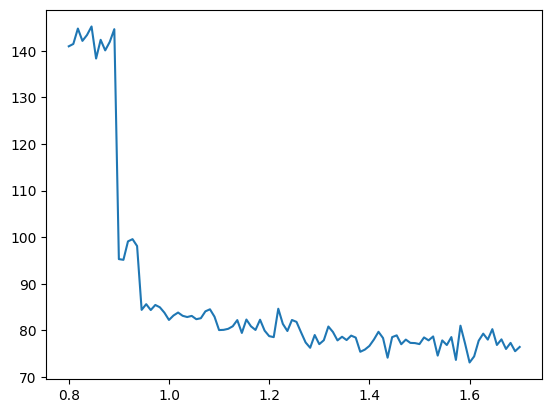

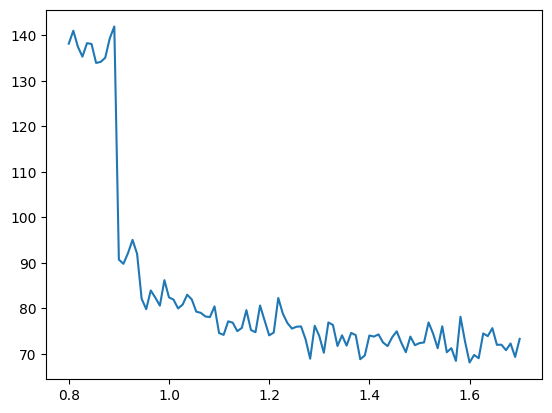

In [19]:
h_mean_alt = []
h_std_alt = []
space = np.linspace(0.8,1.7,100)
for alpha in space:
    policy, policy_bin = policy_maker_it_alt(int_env_alt, protocols[0], alpha)
    print(policy,policy_bin,alpha)
    depth_heuristic = batch_heuristic(2000,int_env_alt,policy)
    h_mean_alt.append(np.mean(depth_heuristic))
    h_std_alt.append(np.std(depth_heuristic))

print(np.amin(h_mean_alt))
plt.plot(space, h_mean_alt)
plt.show()
plt.plot(space, h_std_alt)
plt.show()

### Graphics

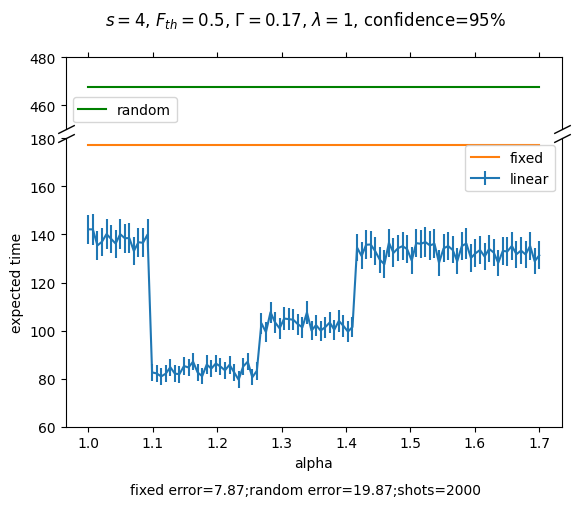

In [48]:

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,height_ratios=[0.25,1])
# fig.subplots_adjust(hspace=0.05)  # adjust space between axes
fig.subplots_adjust(hspace=0.05)  # adjust space between axes
fig.suptitle(r'$s=4$, $F_{th}=0.5$, $\Gamma=0.17$, $\lambda=1$, $p\in(0.2,0.4)$, confidence=95%', fontsize=12)
# plot the same data on both axes
errorh = 2*np.array(h_std)/np.sqrt(2000)
ax2.errorbar(space, h_mean, yerr=errorh, label='heuristic')
ax2.plot(space, np.full(len(space),fill_value=m_depth_fixed), label='fixed')
ax1.plot(space, np.full(len(space),fill_value=m_depth_random),label='random',c='green')




# zoom-in / limit the view to different portions of the data
ax2.set_ylim(60,180)  
ax1.set_ylim(450,480)
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = 0.5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
ax1.legend()
ax2.legend()
plt.xlabel(r'proportion factor $\alpha$')
plt.ylabel('expected time')
txt=r'fixed error=7.87;random error=19.87;shots=2000'
plt.figtext(0.5, -0.03, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

# plt.plot(space, h_mean, label='linear')
# # plt.plot(space, h_mean_int,label='interpolated without knowledge')
# # plt.plot(space, h_mean_alt,label='interpolated with knowledge')
# plt.plot(space, np.full(len(space),fill_value=m_depth_random),label='random')
# plt.plot(space, np.full(len(space),fill_value=m_depth_fixed),label='fixed')
# plt.legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
# plt.xlabel('alpha')
# plt.ylabel('expected time')
# plt.show()
# plt.plot(space, h_std,label='heuristic')
# plt.plot(space, np.full(len(space),fill_value=std_depth_random),label='random')
# plt.plot(space, np.full(len(space),fill_value=std_depth_fixed),label='fixed')
# plt.legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
# plt.xlabel('alpha')
# plt.ylabel('standard deviation')
# plt.show()

the upper bin size is:
47.0
the lower bin size
16.0
the upper bin size is:
47.0
the lower bin size
16.0
the upper bin size is:
47.0
the lower bin size
16.0
the upper bin size is:
47.0
the lower bin size
16.0
the upper bin size is:
47.0
the lower bin size
16.0
the upper bin size is:
47.0
the lower bin size
16.0
the upper bin size is:
47.0
the lower bin size
16.0
the upper bin size is:
47.0
the lower bin size
16.0
the upper bin size is:
47.0
the lower bin size
16.0
the upper bin size is:
47.0
the lower bin size
16.0
the upper bin size is:
47.0
the lower bin size
16.0
the upper bin size is:
47.0
the lower bin size
16.0
the upper bin size is:
47.0
the lower bin size
16.0
the upper bin size is:
47.0
the lower bin size
16.0
the upper bin size is:
47.0
the lower bin size
16.0
the upper bin size is:
47.0
the lower bin size
16.0
the upper bin size is:
47.0
the lower bin size
16.0
the upper bin size is:
47.0
the lower bin size
16.0
the upper bin size is:
47.0
the lower bin size
16.0


C:\Users\天天\AppData\Local\Temp\ipykernel_19428\2687924717.py:33: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([l2, l1], labels=["timesteps", r'$n(F_{\pi(1)})$'], loc = (0.1, 0.8), ncol=5)


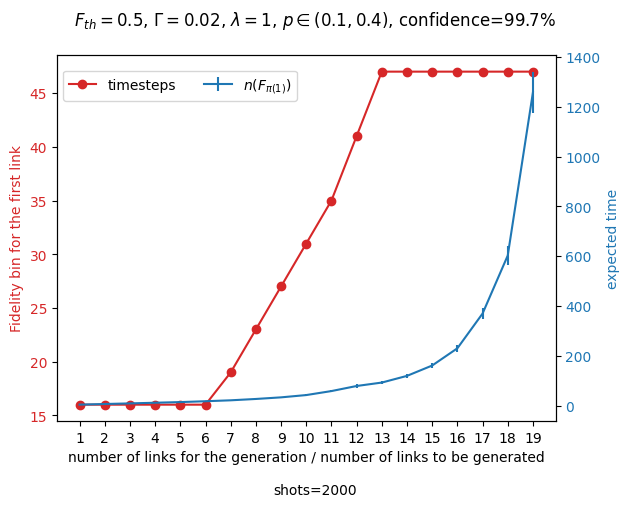

In [35]:
#top bin for different num_qubits

space = range(1,20)
alpha=1.15
top_bin_num = []
for num in space:
    cnt_env = cenv.AcntEnv(protocols, num,threshold, decay_rate)
    policy, policy_bin = policy_maker_ct(cnt_env, alpha)
    top_bin_num.append(policy_bin[0])

#plot


fig, ax1 = plt.subplots()
txt=r'$F_{th}=0.5$, $\Gamma=0.02$, $\lambda=1$, $p\in(0.1,0.4)$, confidence=99.7%'
plt.suptitle(txt,fontsize=12)
color = 'tab:red'
ax1.set_xlabel('number of links for the generation / number of links to be generated')
ax1.set_ylabel('Fidelity bin for the first link', color=color)
l1 = ax1.plot(space, top_bin_num, color=color,label=r'$n(F_{\pi(1)})$', marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('expected time', color=color)  # we already handled the x-label with ax1
errornum = 3*np.array(num_std)/np.sqrt(2000)
l2 = ax2.errorbar(space, num_mean, yerr=errornum,color=color, label='timesteps')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.legend([l2, l1], labels=["timesteps", r'$n(F_{\pi(1)})$'], loc = (0.1, 0.8), ncol=5)
plt.figtext(0.5, -0.03, 'shots=2000', wrap=True, horizontalalignment='center', fontsize=10)
plt.xticks(space)


plt.show()



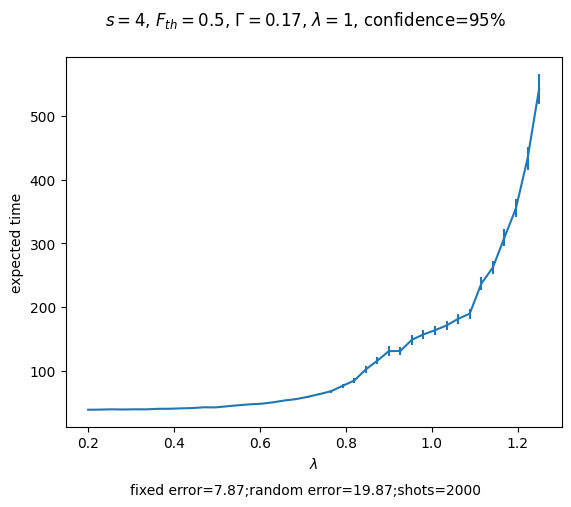

In [100]:

plt.suptitle(r'$s=4$, $F_{th}=0.5$, $\Gamma=0.17$, $\lambda=1$, confidence=95%', fontsize=12)
# plot the same data on both axes
errorlam = 2*np.array(lam_std)/np.sqrt(2000)
space = np.linspace(0.2,1.25,40)
plt.errorbar(space, lam_mean, yerr=errorlam, label='expected time')

plt.xlabel(r'$\lambda$')
plt.ylabel('expected time')
txt=r'fixed error=7.87;random error=19.87;shots=2000'
plt.figtext(0.5, -0.03, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

